In [59]:
import numpy as np
import matplotlib.pyplot as plt
dados = np.genfromtxt('dados_vendas.csv', delimiter=',', dtype=None, names=True)

C:\Users\luist\AppData\Local\Temp\ipykernel_11508\2162529545.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dados = np.genfromtxt('dados_vendas.csv', delimiter=',', dtype=None, names=True)


In [60]:
totais_vendas = {}
totais_receita = {}

for linha in dados:
    produto = linha['Produto'].decode('utf-8')
    quantidade = linha['Quantidade']
    receita = linha['Receita']

    if produto in totais_vendas:
        totais_vendas[produto] += quantidade
    else:
        totais_vendas[produto] =quantidade

    if produto in totais_receita:
        totais_receita[produto] += receita
    else:
        totais_receita[produto] = receita
        
print(f' total de Receitas por produto {totais_receita}')
print(f'total de vendas por produto {totais_vendas}')

 total de Receitas por produto {'Produto A': 630.0, 'Produto B': 390.0, 'Produto C': 750.0}
total de vendas por produto {'Produto A': 63, 'Produto B': 39, 'Produto C': 75}


In [61]:
produtos = list(totais_vendas.keys())
total_vendas = list(totais_vendas.values())
total_receita = list(totais_receita.values())

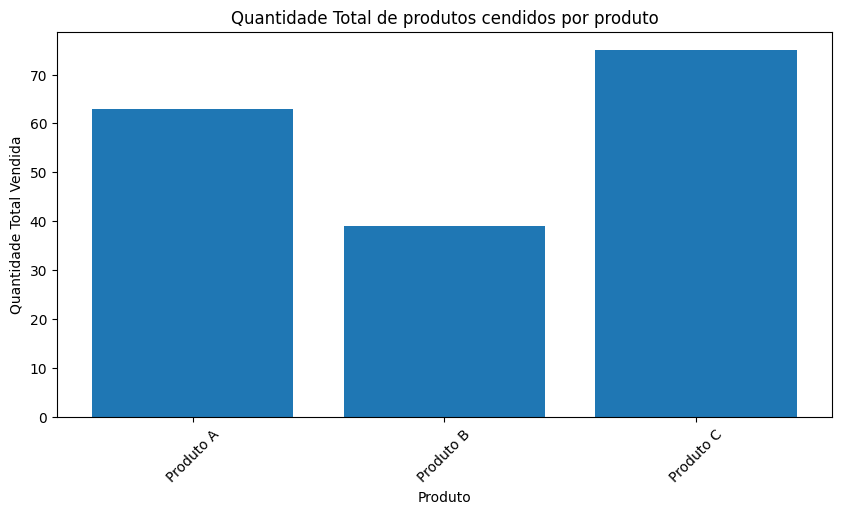

In [62]:
plt.figure(figsize=(10,5))
plt.bar(produtos, total_vendas)
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.title('Quantidade Total de produtos cendidos por produto')
plt.xticks(rotation=45)
plt.show()

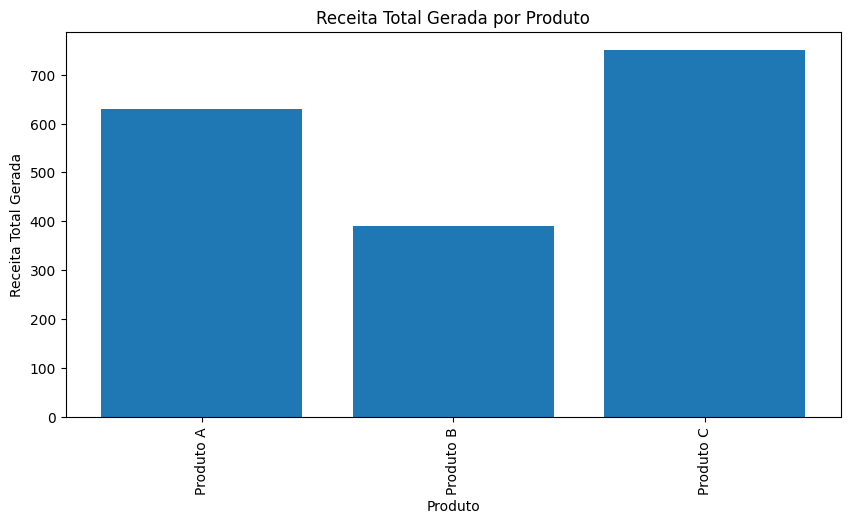

In [63]:
plt.figure(figsize=(10, 5))
plt.bar(produtos, total_receita)
plt.xlabel('Produto')
plt.ylabel('Receita Total Gerada')
plt.title('Receita Total Gerada por Produto')
plt.xticks(rotation=90)
plt.show()

In [64]:
meses = []
anos = []

for linha in dados:
    data = linha['Data'].decode('utf-8')
    partes_data = data.split('-')
    ano = int(partes_data[0])
    mes = int(partes_data[1])

    meses.append(mes)
    anos.append(ano)


In [65]:
meses = np.array(meses)
anos = np.array(anos)

In [66]:
# Crie uma nova estrutura de dados com as colunas de meses e anos
novos_dados = np.empty(dados.shape[0], dtype=[('Data', 'datetime64[D]'), ('Produto', 'U50'), ('Quantidade', 'i4'), ('Receita', 'f8'), ('Mês', 'i4'), ('Ano', 'i4')])

# Copie os dados existentes para a nova estrutura de dados
novos_dados['Data'] = dados['Data']
novos_dados['Produto'] = dados['Produto']
novos_dados['Quantidade'] = dados['Quantidade']
novos_dados['Receita'] = dados['Receita']
novos_dados['Mês'] = meses
novos_dados['Ano'] = anos

# Use a nova estrutura de dados para criar o gráfico de evolução das vendas por mês

In [67]:
# Crie um dicionário para armazenar as vendas mensais por produto
vendas_mensais = {}

# Itere pelos dados e calcule as vendas mensais por produto
for linha in dados:
    produto = linha['Produto'].decode('utf-8')
    mes = linha[-2]  # Índice do mês na última coluna
    quantidade = linha['Quantidade']
    
    chave = (produto, mes)
    
    if chave in vendas_mensais:
        vendas_mensais[chave] += quantidade
    else:
        vendas_mensais[chave] = quantidade


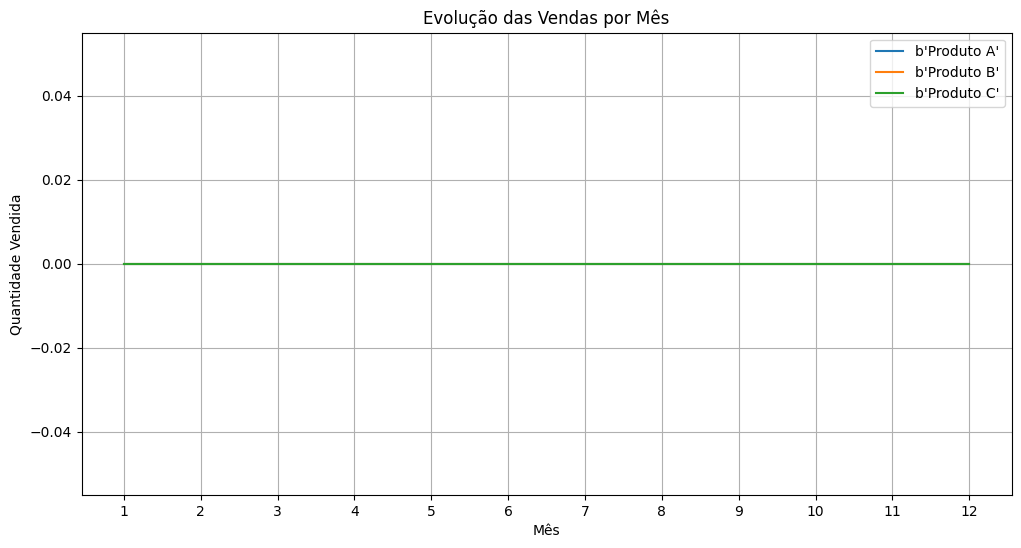

In [68]:
# Extraia os produtos únicos
produtos_unicos = np.unique(dados['Produto'])

# Crie um gráfico de evolução das vendas por mês para cada produto
plt.figure(figsize=(12, 6))

for produto in produtos_unicos:
    vendas_produto = [vendas_mensais[(produto, mes)] if (produto, mes) in vendas_mensais else 0 for mes in range(1, 13)]
    plt.plot(range(1, 13), vendas_produto, label=produto)

plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.title('Evolução das Vendas por Mês')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()
